<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB

#### Load the csv file

In [3]:
df_b=pd.read_csv('bank.csv')
df_b.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,no
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,yes
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,yes


In [5]:
df_b.shape

(9640, 11)

In [6]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [7]:
df_b.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df_b.skew()

age               0.990535
duration          2.256322
campaign          5.098841
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

In [9]:
df_b['y']=df_b['y'].replace({'yes':1,'no':0})

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

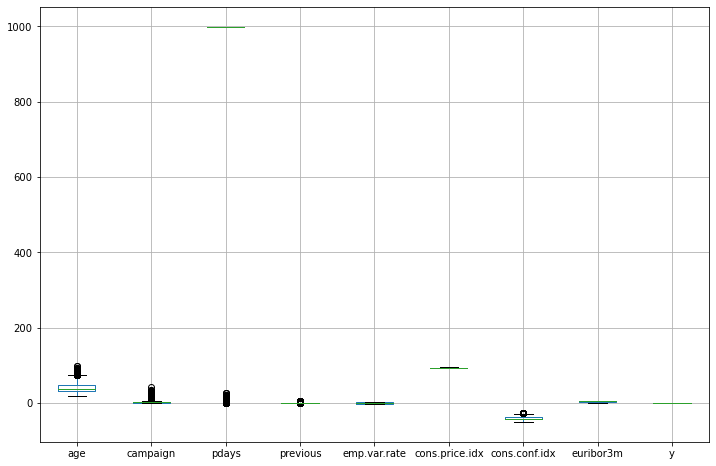

In [11]:
plt.figure(figsize=(12,8))
df_b.drop(['duration','nr.employed'],axis=1).boxplot()

In [12]:
df_b.skew()

age               0.990535
duration          2.256322
campaign          5.098841
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
y                 0.074753
dtype: float64

In [13]:
Q1=df_b.quantile(0.25)
Q3=df_b.quantile(0.75)

IQR=Q3-Q1
bank_df=df_b[~((df_b<(Q1-1.5*IQR)) | (df_b>(Q3+1.5*IQR))).any(axis=1)]
bank_df=df_b.reset_index(drop=True)

In [14]:
df_b.skew()

age               0.990535
duration          2.256322
campaign          5.098841
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
y                 0.074753
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
bnk_target=df_b.y
bnk_feat=df_b.drop('y',axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
bnk_feat=bnk_feat.replace(to_replace='unknown',value=np.nan)
bnk_feat.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
bnk_feat.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
bnk_feat.std()

age               11.901274
duration         354.768370
campaign           2.384519
pdays            306.531615
previous           0.684605
emp.var.rate       1.717852
cons.price.idx     0.631366
cons.conf.idx      5.322795
euribor3m          1.886179
nr.employed       86.347481
dtype: float64

In [19]:
bnk_feat=bnk_feat.drop(['pdays','previous'],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

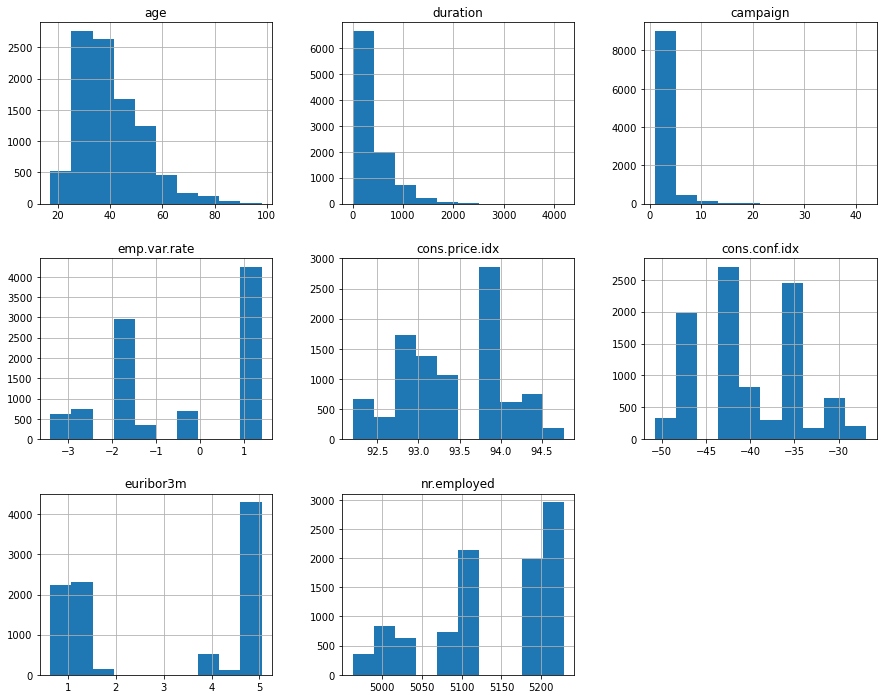

age               0.990535
duration          2.256322
campaign          5.098841
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

In [20]:
plt.rcParams['figure.figsize']=(15,12)
bnk_feat.hist()
plt.show()
bnk_feat.skew()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

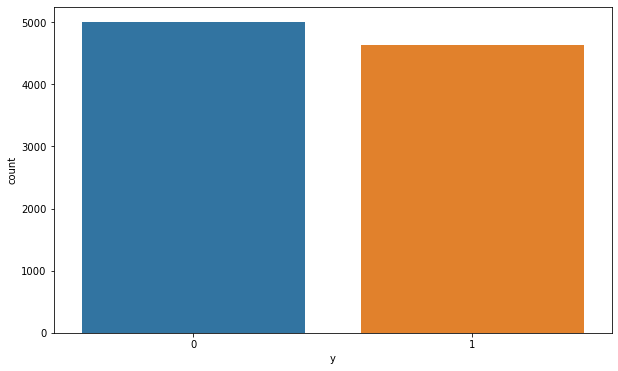

In [23]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(x=bnk_target)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
s_c=StandardScaler()
scaled_data=pd.DataFrame(s_c.fit_transform(bnk_feat),columns=bnk_feat.columns)
scaled_data.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.696316,-0.492076,-0.146440,0.908285,0.805042,0.726230,0.983194,0.620697
1,-0.696316,0.877903,3.208708,1.082931,0.684662,-0.457420,1.037275,1.050379
2,0.396061,-0.943098,2.369921,1.082931,-0.066130,0.782594,1.038865,1.050379
3,-0.612287,0.057607,-0.565833,-0.372451,1.766500,-1.735011,-1.045350,-2.012985
4,0.564119,1.475507,-0.146440,-0.779958,-0.650607,-1.284096,-0.842284,-0.443662


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [25]:
X=scaled_data
y=bnk_target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and find roc_auc score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
def plot_cm(model):
    model = model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    prob = model.predict_proba(x_test)[:,1]
    cm = confusion_matrix(y_test,ypred)
    sns.heatmap(cm,annot=True)
    plt.show()
    print(roc_auc_score(y_test,prob))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean',p=2)
model = knn.fit(x_train,y_train)
ypred = model.predict(x_test)
print('accuracy_score of model is ',round(accuracy_score(y_test,ypred),2))

accuracy_score of model is  0.86


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

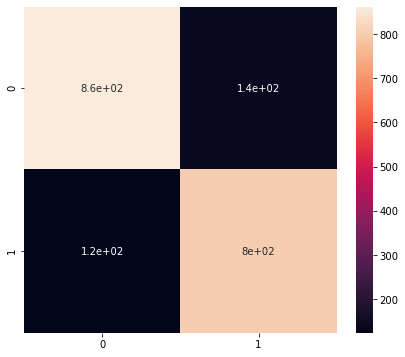

0.9098940348245194


In [30]:
plt.rcParams['figure.figsize'] = (7,6)
plot_cm(knn)

In [31]:
print('Classification Report')
print(classification_report(y_test,ypred))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1002
           1       0.85      0.87      0.86       926

    accuracy                           0.86      1928
   macro avg       0.86      0.86      0.86      1928
weighted avg       0.86      0.86      0.86      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [32]:
para_tune={'n_neighbors' : np.arange(1, 25, 2),
           'metric' : ['hamming','euclidean','manhattan','Chebyshev']}

knn=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn,
                     param_grid=para_tune,
                     cv=3,
                     scoring='accuracy')

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [34]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 15}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
knn_1=KNeighborsClassifier(n_neighbors=15,metric='manhattan')
knn_1=knn_1.fit(x_train,y_train)
y_pred1=knn_1.predict(x_test)


In [36]:
print('Classification Report')
print(classification_report(y_test,y_pred1))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1002
           1       0.85      0.92      0.89       926

    accuracy                           0.89      1928
   macro avg       0.89      0.89      0.89      1928
weighted avg       0.89      0.89      0.89      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

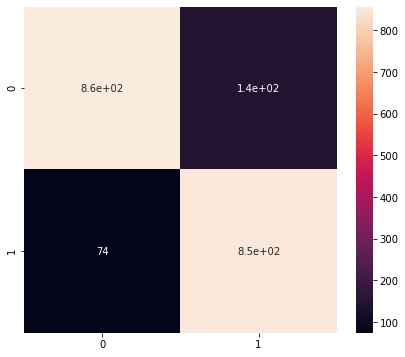

0.9415709617482099


In [38]:
plot_cm(knn_1)

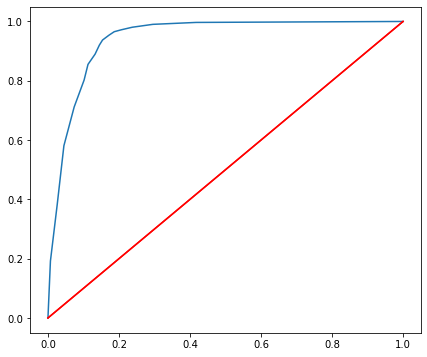

In [39]:
prob = knn_1.predict_proba(x_test)[:,1]
fpr,tpr,th = roc_curve(y_test,prob)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
cm = confusion_matrix(y_test,y_pred1)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
print('% of correctly classified is',round(((TN+TP)/(TP+TN+FP+FN))*100,2))
print('% of mis classified is',round(((FP+FN)/(TP+TN+FP+FN))*100,2))


% of correctly classified is 88.64
% of mis classified is 11.36


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
accuracy = []
k = np.arange(1,26,2)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn = knn.fit(x_train,y_train)
    ypred_test = knn.predict(x_test)
    acc1 = accuracy_score(y_test,ypred_test)
    accuracy.append(acc1)
print(accuracy)

[0.825207468879668, 0.8630705394190872, 0.8801867219917012, 0.8786307053941909, 0.8858921161825726, 0.8838174273858921, 0.8879668049792531, 0.8884854771784232, 0.8874481327800829, 0.8853734439834025, 0.8858921161825726, 0.8858921161825726, 0.8853734439834025]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

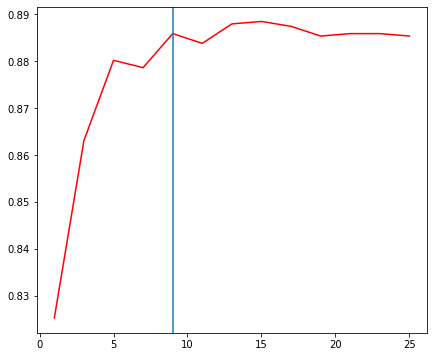

In [42]:
k=list(range(1,26,2))
sns.lineplot(x=k,y=accuracy,color='red')
plt.axvline(x=9)
plt.show()

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
gb=GaussianNB()
gb=gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1002
           1       0.75      0.85      0.79       926

    accuracy                           0.79      1928
   macro avg       0.79      0.79      0.79      1928
weighted avg       0.79      0.79      0.79      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

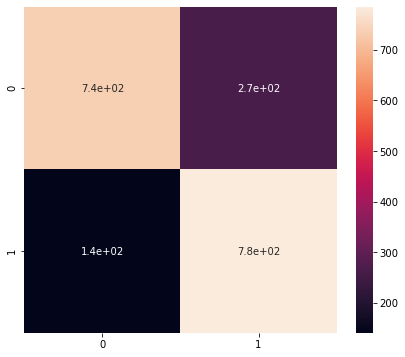

0.8905838431129103


In [44]:
plot_cm(gb)

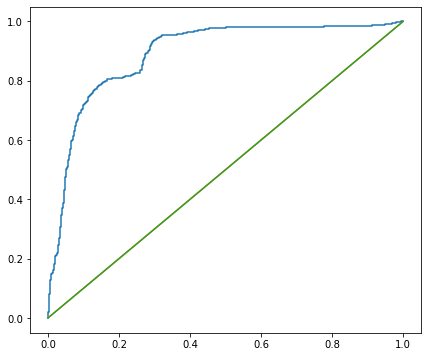

In [45]:
y_probab=gb.predict_proba(x_test)[:,1]
fpr,tpr,th=roc_curve(y_test,y_probab)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
score=cross_val_score(gb,x_train,y_train,cv=10,scoring='accuracy')
print('The Avg Accuracy Score is : ',round(np.mean(score),4))

The Avg Accuracy Score is :  0.7774
